# Сборный проект

**Описане проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

В основных данных есть информация о  данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

 /datasets/games.csv.
 
**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- P_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

**Цель исследования**

Проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Выявить определяющие успешность игры закономерности;

**Ход исследования**



Таким образом, исследование пройдет в 6 этапов:
- Загрузка данных: загузка и изучение общей информации из представленного датасета;
- Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий;
- Исследовательский анализ данных: изучение основных параметров объектов, их распределения, зависимости продаж от региона и жанра платформы, а так же, выявление и обработка аномалий;
- Объединение данных: добавление новых столбцов, создание новых датасетов для анализа данных;
- Подсчёт выручки
- Проверка гипотез

In [1]:
# Импортируем все необходимые для проекта библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom
import matplotlib.pyplot as plt

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
#Загрузим файл
data_game = pd.read_csv('/datasets/games.csv')
data_game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#Посмотрим общую информацию о файле
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по разделу**

в данном датафрейме всего 16715 строк, имеются пропуски, дубликаты, нарушение в типизации данных и названия колонок имеют лексическую ошибку. Однако, при изменении, данных достаточно для исследования

### Шаг 2. Подготовьте данные

#### Замените названия столбцов (приведите к нижнему регистру);


In [4]:
#Приведем названия столбцов к нижнему регистру
data_game.columns = data_game.columns.str.lower()
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Изначально, изменить тип данных невозможно, так как в столбцах присутствуют пропуски и код будет выдавать ошибку. Обработаем данные

In [5]:
#Для начала, найдем явные дубликаты
data_game.duplicated().sum()

0

In [6]:
# Проверим наличие неявных дубликатов
data_game = data_game.drop_duplicates()
print(data_game[data_game.duplicated(['name', 'platform', 'year_of_release'])].count())


name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64


In [7]:
# Неявных дубликатов очень мало, считаю что они не повлияют на исследование, поэтому удалим их
data_game = data_game.drop_duplicates(['name', 'platform', 'year_of_release'])
print(data_game[data_game.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [8]:
#Найдем столбци с пропусками
data_game.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [9]:
# Так как в столбце name всего 1 пропуск, предлагаю удалить их, 
# ведь 1 строка не исказит исследование о 17тыс. строках
data_game = data_game.dropna(subset = ['name'])

In [10]:
# Так как в столбце year_of_release всего 269 пропусков, 
# предлагаю удалить их, ведь 269 строк не исказят исследование о 17тыс. строках
data_game = data_game.dropna(subset = ['year_of_release'])

In [11]:
# Так как пропуски в critic_score занимают почти подовину данных,
# удалять строки нельзя, а подставляя среднее или медиану или 0, мы исказим индивидуальные значения обратной связи. Заменим их на -1
# заменили на отрицательное число, чтобы не искажать оценки от 0 до 100
data_game['critic_score'] = data_game['critic_score'].fillna('-1')

In [12]:
# Так как пропуски в user_score занимают почти подовину данных, 
# удалять строки нельзя, а подставляя среднее или медиану или 0, мы исказим индивидуальные значения обратной связи. Заменим их на -1
# заменили на отрицательное число, чтобы не искажать оценки от 0 до 10
data_game['user_score'] = data_game['user_score'].fillna(-1)
data_game['user_score'].value_counts()

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
9.6       2
0.2       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [13]:
# В столбце с оценками игроков 2376 оценок "tbd",
# Аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. 
# Расшифровывается с ангилийского "to be defined".
# Удалить данные мы не можем, так как отсутствующие данные занимают 15% от всего исследования.  
# Предлагаю заменить их аналогично пропускам.
data_game.loc[data_game['user_score'] == 'tbd', 'user_score'] = -1

In [14]:
# В столбце rating почти треть пропущеных значений.
# Мы так же не можем подставить медиану или среднее, так как он определяется множеством параметров. Заменим на unknown
data_game['rating'] = data_game['rating'].fillna('unknown')

In [15]:
# В данных есть игры с 0 продажами, видимо это ошибка, удалим их
data_game.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')
data_game.drop(data_game.index).reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
# Проверим, остались ли пропуски
data_game.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [17]:
data_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1,-1,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1,-1,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,-1,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1,-1,unknown


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;


In [18]:
#Преобразуем столбцы с годом выпуска, оценкой критиков и оценкой игроков
data_game['year_of_release'] = (data_game['year_of_release']).astype('int') # приводим к целочисленному дату
data_game['critic_score'] = (data_game['critic_score']).astype('int') # так как оценка Х100, округляем
data_game['user_score'] = (data_game['user_score']).astype('float') # так как оценка Х10, оставляем дробь
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 2.0+ MB


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [19]:
# Сложим всю выручку по странам
data_game['sales_total']=data_game['na_sales']+data_game['eu_sales']+data_game['jp_sales']+data_game['other_sales']
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


**Вывод по разделу**

При исследовании данных были обнаружены и удалены пропуски в столбцах name и year_of_release из за их небольшого количества. В столбцах critic_score и user_score пропуски были заменены на -1, так как отсутствующих данных слишком много. Пропуски в столбце rating тоже заменять не стали, так как неизвестна методика выставления рейтинга. Изменили типы данных уу столбцов с годом выпуска, а также у оценок критиков и игроков. Выяснили, какую выручку несет каждая игра по всему миру.

### Шаг 3. Проведите исследовательский анализ данных


#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [20]:
# Посмотрим на общие данные
data_game['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Согласно исследованию, игры выпускались с 1980г по 2016г. Рассмотрим более подробно

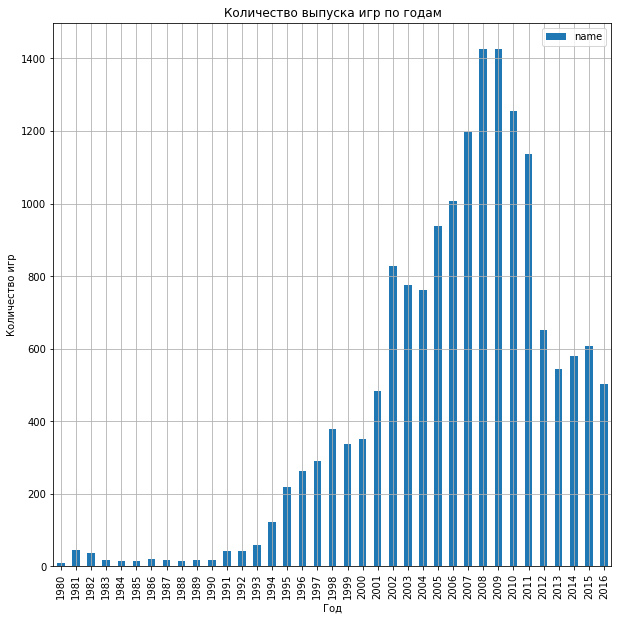

In [21]:
# Построим диаграмму о выпуске игр по году создания
data_game.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar' , grid=True, figsize=(10,10))

plt.title('Количество выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Согласно столбчатой диаграммы, в период с 1980 по 1990 год выпускали не более 25-30 игр в год. Данные этот период не так важны для исследования. 
В то время как пик выпуска пришелся на 2008-2009гг., после чего, производство пошло на спад, вероятно из за создания новых технологий и гонкой за качество.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


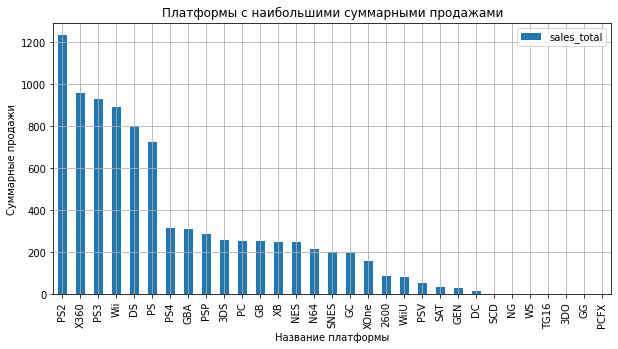

In [22]:
# Посмотрим, сколько всего было продано игр всех фирм
data_game.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).plot(kind='bar' , grid=True, figsize=(10, 5))
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.show()

In [23]:
#Из диаграммы видно, что основные производители игр это: PS2, X360, P53, Wii, DS и PS.
#Выведем их в отдельную переменную для разбора
best_sales = data_game.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).head(6)
best_sales


,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


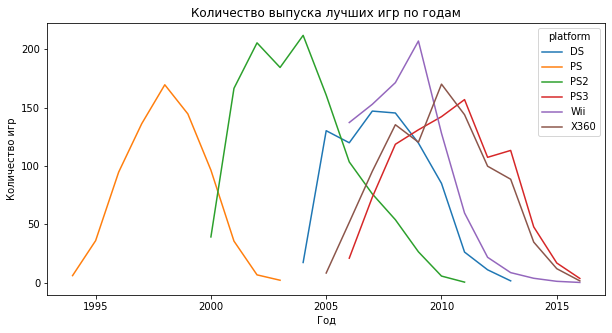

In [24]:
# Создадим график по лучшим платформам
best_sales = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
#  У платформы DS всего 2 точки: 1985 и 2004. Возможно это ошибка, так как в 1985 году этой платформы еще не существовало
# Уберем 1985г из исследования
data_best_sales = pd.DataFrame(data_game.query('platform in @best_sales and year_of_release != 1985'))
# Группируем и суммируем данные
data_best_sales_all = data_best_sales.groupby(['platform', 'year_of_release'])[['sales_total']].sum()
# Создаем график
plt.figure(figsize=(10, 5))
sns.lineplot(x='year_of_release', y='sales_total', hue='platform', data=data_best_sales_all.reset_index())
plt.title('Количество выпуска лучших игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

**Предварительный вывод**

Платформа DS первой стала выпускать игры и производство длилось до 2013г с резким пиком с 2004 по 2007гг. Что касаемо платформ PS, мы знаем, что PS, PS2 и PS3 это платформа одного производителя с новыми модификациями, поэтому, на графике видно, при окончании производства старой версии резко запускалось производство игр для новых версий, чтобы оправдать затраты на модификацию. Платформа  X360 начала выпускаться в 2005г с пиком производства в 2010г. Ситуация с производством аналогична с PS, данная платформа является предшественником ХВ, которая была не столь копулярна, а после 2013г произошла модификация до XOne.

Приводя общий вывод по исследованию, у каждой платформы есть примерный срок жизни - 10лет, с пиком продаж - 5 лет. Большинство производителей производило игры на платформы, которые были произведены изначально. Однако, платформы DS и PS выпускали новые модификации, что увеличивало продажи.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.


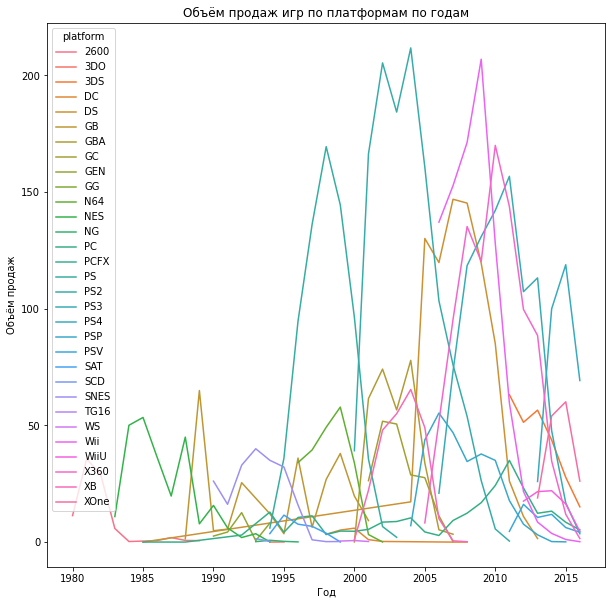

In [25]:
# Создадим график по платформам, чтобы выявить актуальный период
data_sale = pd.DataFrame(data_game.query('platform in @data_game.platform.unique()'))
data_sale_all = data_sale.groupby(['platform', 'year_of_release'])[['sales_total']].sum().reset_index()
plt.figure(figsize=(10, 10))
sns.lineplot(x='year_of_release', y='sales_total', hue='platform', data=data_sale_all)
plt.title('Объём продаж игр по платформам по годам')
plt.xlabel('Год')
plt.ylabel('Объём продаж')
plt.show()

Предлагаю взять актуальный период с 2013г по 2016г. В этот период вышли новые модификации платформ, а так же, качество и характеристики игр в этот период отличаются от предыдущих годов, что будет актуальнее для прогноза на будующие года.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


In [26]:
# Обозначим актуальные года
lider_year = data_game[data_game['year_of_release'] >= 2013]
lider_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [27]:
# Посмотрим детально выручку по платформам за выбраные года
lider_year_sales = pd.pivot_table(lider_year, index=['platform','year_of_release'], values='sales_total', aggfunc = 'sum')
lider_year_sales 

sales_total
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

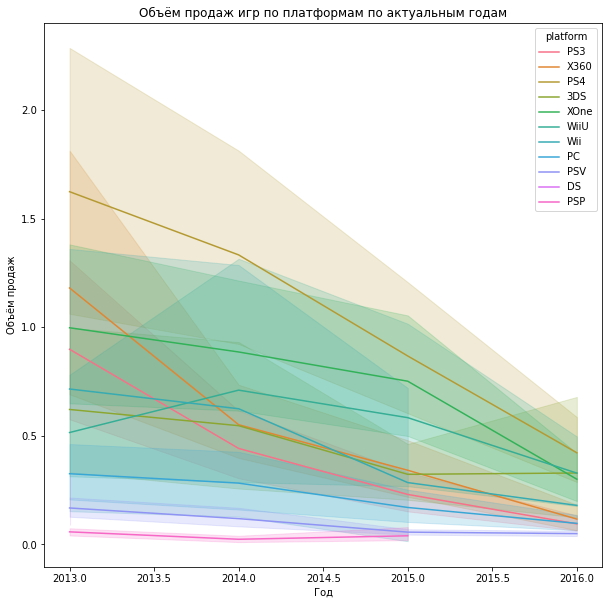

In [28]:
# Построим график по платформам за выбраные года
plt.figure(figsize=(10,10))
sns.lineplot(x='year_of_release', y='sales_total', hue='platform', data=lider_year)
plt.title('Объём продаж игр по платформам по актуальным годам')
plt.xlabel('Год')
plt.ylabel('Объём продаж')
plt.show()


In [29]:
# Посмотрим, какая платформа приносила больше всего выручки за выбраный период
lider_year_sales_total = pd.pivot_table(lider_year_sales, index='platform', values='sales_total', aggfunc = 'sum')
lider_year_sales_total.sort_values('sales_total', ascending=False)

,sales_total
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


**Предварительный вывод и проноз на 2017г**

За весь выбранный период наблюдается падение продаж всех консолей. Это связано с прорывом в сфере компьютерных игр, для которых не нужна была дополнительная консоль. Безусловно, лидируют продажи PS4, PS3 и XOne. Уверенна, что PS3 в 2017г пойдет на спад, из за выхода PS4, а XOne будет расти, так как это только вышедшая модификация XB.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


In [30]:
# Посмотрим общую информацию по выбраным годам
lider_year.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,31.407524,3.048724,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,37.282494,3.963069,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-1.000000,3.500000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.100000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


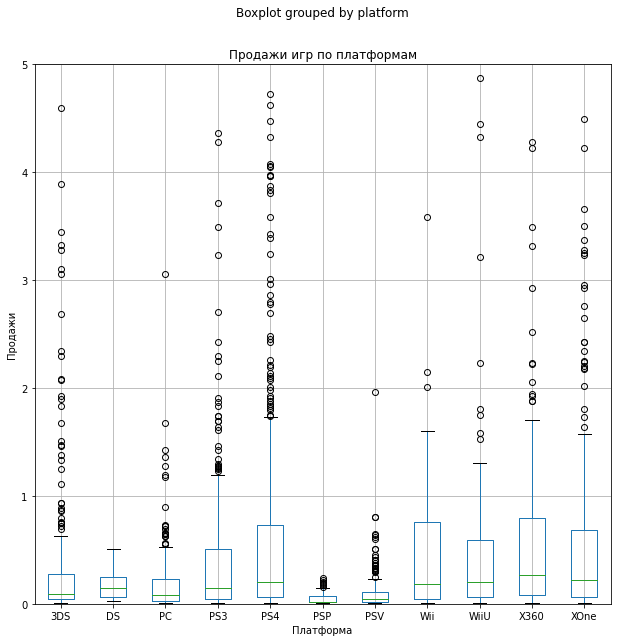

In [31]:
# Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам
lider_year.boxplot(by='platform', column=['sales_total'], figsize=(10,10))
plt.ylim(0,5)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

**Предварительный вывод**

Абсолютно все платформы имеют выбросы. Самая большая медиана и максимальное значение 3-его квартиля наблюдается у платформы X360. Наибольшая выручка у PS4, а наименьшая у PSP. Платформы PS4 и XOne имеют близкие значение.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Предлагаю за основу взять данные по PS4, так как у данной платформы больше всего продаж, соответственно и больше всего оценок.

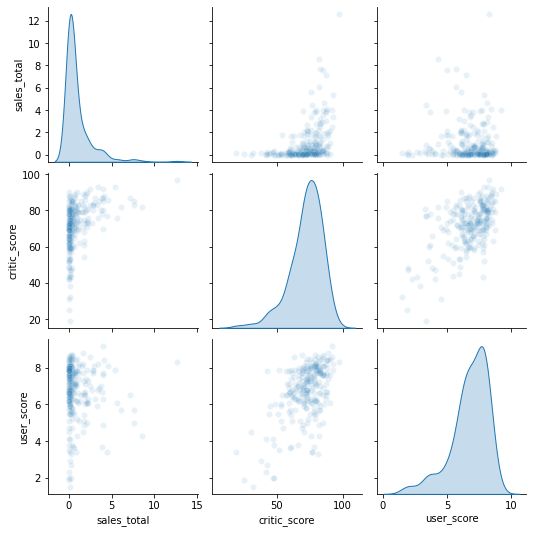

In [32]:
# Выберем именно данные по PS4
lider_year_ps4 = lider_year[lider_year['platform'] == 'PS4'].loc[:, ['sales_total', 'critic_score', 'user_score']]
# Удаляем значения -1 из 'critic_score' и 'user_score', которыми мы заполнили пропуски
lider_year_ps4_filtered = lider_year_ps4.loc[
    (lider_year_ps4['critic_score'] != -1) & (lider_year_ps4['user_score'] != -1)]
# Построим диаграммы разброса
sns.pairplot(lider_year_ps4_filtered, diag_kind='kde', plot_kws={'alpha': 0.1});

In [33]:
# Найдем корреляцию
lider_year_ps4_filtered.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


**Предварительный вывод**

- Корреляция между оценками критиков и продажами указывает на важность профессиональных рецензий для коммерческого успеха.
- Положительная корреляция между оценками критиков и пользователей может говорить о более широком согласии среди них.
- Отсутствие значимой корреляции между продажами и оценками пользователей может свидетельствовать о том, что другие факторы (например, маркетинг, популярность игры, платформы) могут иметь большее влияние на продажи, чем мнения конечных пользователей.

#### Соотнесите выводы с продажами игр на других платформах.


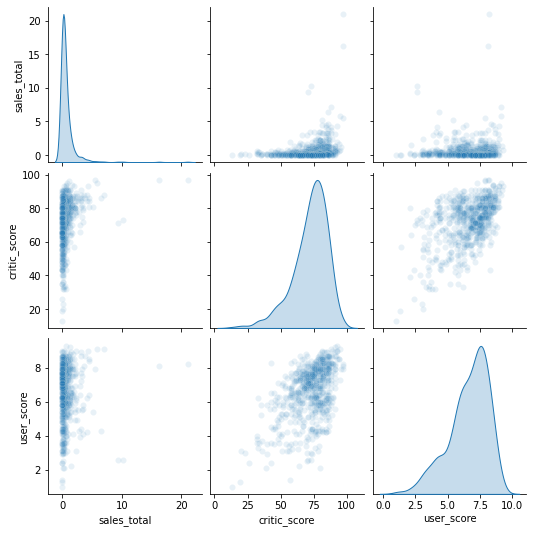

In [34]:
# Выберем именно данные по лидирующим платформам
platforms = ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']
# Фильтруем данные по выбранным платформам
platforms_filtered = lider_year[lider_year['platform'].isin(platforms)].loc[:, ['sales_total', 'critic_score', 'user_score']]
# Удаляем значения -1 из 'critic_score' и 'user_score'
platforms_filtered = platforms_filtered.loc[(platforms_filtered['critic_score'] != -1) & (platforms_filtered['user_score'] != -1)]
# Строим диаграммы разброса
sns.pairplot(platforms_filtered, diag_kind='kde', plot_kws={'alpha': 0.1});

In [35]:
# Найдем корреляцию
platforms_filtered.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.284585,0.034455
critic_score,0.284585,1.000000,0.499805
user_score,0.034455,0.499805,1.000000


**Предварительный вывод**

По результатам исследования подтверждают результаты по PS4. оценки критиков и пользователей могут быть связаны, но существует лишь умеренная связь оценок критиков с общими продажами, тогда как связь между общими продажами и оценками пользователей практически отсутствует. Это может свидетельствовать о том, что аудитории (критики и обычные пользователи) имеют различные критерии оценки, и оценки критиков могут играть более важную роль в продвижении продаж, чем оценки пользователей.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

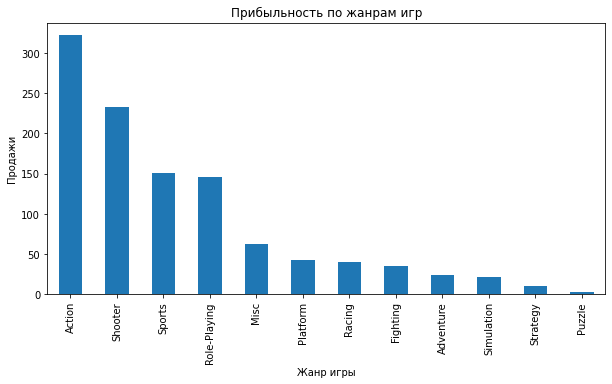

In [36]:
# Посмотрим прибыльность жанров за интересующие нас года
(lider_year
 .pivot_table(index='genre', values='sales_total', aggfunc='sum')
 .sort_values('sales_total', ascending=False)
 .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False)
)
plt.title('Прибыльность по жанрам игр')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи')
plt.show()

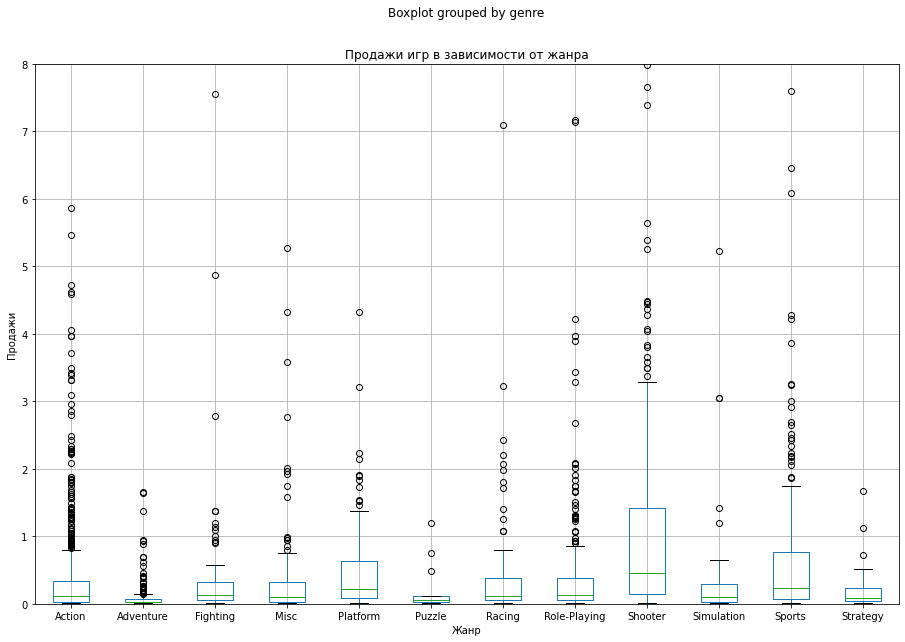

In [37]:
lider_year.boxplot(by='genre', column=['sales_total'], figsize=(15,10))
plt.ylim(0,8)
plt.title('Продажи игр в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

**Предварительный вывод**

Выводы на основе этих данных указывают, что многие жанры имеют значительные выбросы и варьируются по средним значениям оценок. Жанры "Role-Playing" и "Shooter" характеризуются самым большим разбросом оценок, что может свидетельствовать о большом разнообразии качества игр эти жанров. В то же время такие жанры, как "Fighting" и "Strategy", имеют относительно стабильные оценки.

**ВЫВОД ПО РАЗДЕЛУ**

Согласно анализу, в период с 1980 по 1990 год выпускали не более 25-30 игр в год, что делает эти данные менее значимыми для исследования. Пик выпуска игр пришелся на 2008-2009 годы, после чего наблюдается спад, вероятно, из-за новых технологий и акцента на качество. Платформа DS начала выпуск игр первой, с пиком производства в 2004-2007 годах, продолжая до 2013 года. 

Платформы PS (PS, PS2, PS3) демонстрируют скачки в производстве игр при переходе на новые модификации, что оправдывает затраты на обновления. X360, запущенная в 2005 году, также показала пик в 2010 году, перед переходом на XOne после 2013 года. 

Общий вывод указывает на срок жизни платформы около 10 лет и пик продаж в 5 лет. Новые модификации, как у DS и PS, способствовали увеличению продаж. Важно изучить период с 2013 по 2016 год, когда появились новые версии платформ и изменилось качество игр.

За этот период наблюдается падение продаж всех консолей, что связано с ростом компьютерных игр, не требующих дополнительных консолей. Лидерами продаж остаются PS4, PS3 и XOne. Ожидается спад PS3 в 2017 году с выходом PS4, в то время как XOne продолжит расти.

Корреляция между оценками критиков и продажами подчеркивает важность профессиональных рецензий для успеха, положительная связь между оценками критиков и пользователей указывает на согласие, а отсутствие корреляции между продажами и оценками пользователей может говорить о влиянии других факторов, таких как маркетинг. 

Исследование подтверждает, что оценки критиков могут иметь большее значение для продаж, чем мнения пользователей. Жанры "Role-Playing" и "Shooter" характеризуются самым большим разбросом оценок, что может свидетельствовать о большом разнообразии качества игр эти жанров. В то же время такие жанры, как "Fighting" и "Strategy", имеют относительно стабильные оценки.

### Шаг 4. Составьте портрет пользователя каждого региона


#### Определите для пользователя каждого региона (NA, EU, JP):


##### Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [38]:
# Найдем топ-5 платформ в Северной Америке
top5_platform_na = pd.pivot_table(
                                  lider_year, index='platform', 
                                  values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
top5_platform_na.head(5)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


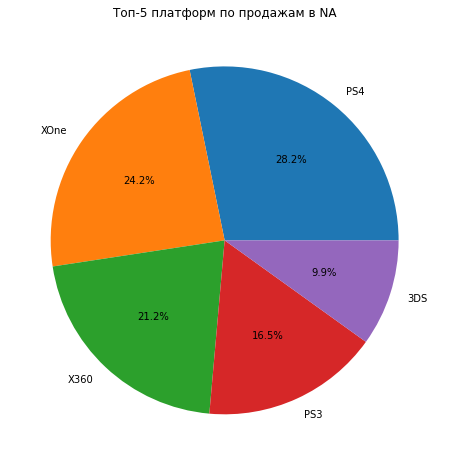

In [39]:
# Посмотрим долю рынка в стране
top5_platform_na = top5_platform_na.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_platform_na['na_sales'], labels=top5_platform_na.index, autopct='%1.1f%%')
plt.title('Топ-5 платформ по продажам в NA')
plt.show()

По доле рынка в Северное Америке не все так однозначно. Лидирует платформа PS4, однако следов с разницей в 3% идет XOne и X360. С учетом, что  XOne и X360, это, по сути одна и таж платформа, но с разными модимикациями, можно сделать вывод, что в данной стране xbox предпочитают преимущественно.

In [40]:
# Найдем топ-5 платформ в Европе
top5_platform_eu = pd.pivot_table(
                                  lider_year, index='platform', 
                                  values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
top5_platform_eu.head(5)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


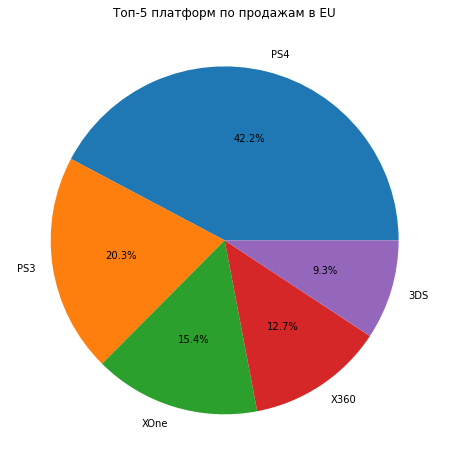

In [41]:
# Посмотрим долю рынка в стране
top5_platform_eu = top5_platform_eu.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_platform_eu['eu_sales'], labels=top5_platform_eu.index, autopct='%1.1f%%')
plt.title('Топ-5 платформ по продажам в EU')
plt.show()

В Европпе пеззаговорочным лидером является платформа PS. Доля платформы двух модификаций составляет 62% от всего рынка. Еще 18% принадлежит платформам xbox. И около 10% пользователей верны Nintendo.

In [42]:
# Найдем топ-5 платформ в Японии
top5_platform_jp = pd.pivot_table(
                                  lider_year, index='platform', 
                                  values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
top5_platform_jp.head(5)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


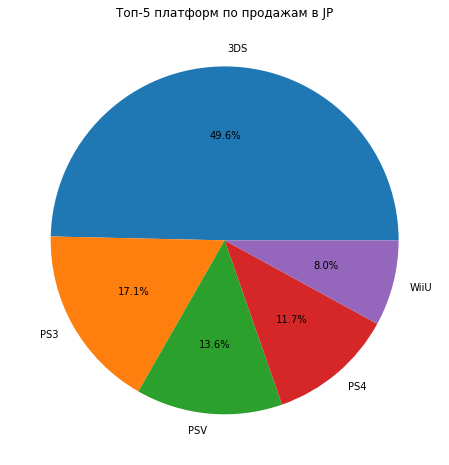

In [43]:
# Посмотрим долю рынка в стране
top5_platform_jp = top5_platform_jp.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_platform_jp['jp_sales'], labels=top5_platform_jp.index, autopct='%1.1f%%')
plt.title('Топ-5 платформ по продажам в JP')
plt.show()

В Японии ровно половину рынка занимает отечественная платформа Nintendo. 32% занимает рынок PS, с небольшим отрывам PS4 в 17%. Замыкает ТОП-5 WiiU с долей  в 8%.

In [44]:
# Найдем топ-5 платформ в других странах
top5_platform_other_sales = pd.pivot_table(
                                  lider_year, index='platform', 
                                  values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
top5_platform_other_sales.head(5)

,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.28


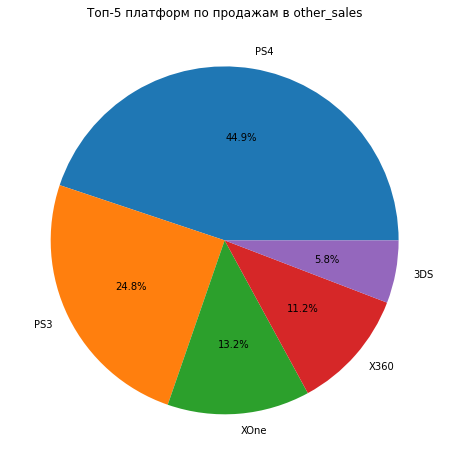

In [45]:
# Посмотрим долю рынка в стране
top5_platform_other_sales = top5_platform_other_sales.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_platform_other_sales['other_sales'], labels=top5_platform_other_sales.index, autopct='%1.1f%%')
plt.title('Топ-5 платформ по продажам в other_sales')
plt.show()

В остальных странах рынок поделился на 2 стороны 70% PS и 30% xbox. Но с уверенностью можно сказать, что лидер всех стран - PS4/

**Предварительный вывод**

Во всем мире рынок делиться на 2 лагеря: PS и xbox. Однако, в Японии, жители предпочитают отечественные игры 3DS. Безусловно, суммарный лидер продаж - это PS4.

##### Самые популярные жанры (топ-5). Поясните разницу.


In [46]:
# Найдем топ-5 жанров в Северной Америке
top5_genres_na = pd.pivot_table(
                                  lider_year, index='genre', 
                                  values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
top5_genres_na.head(5)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


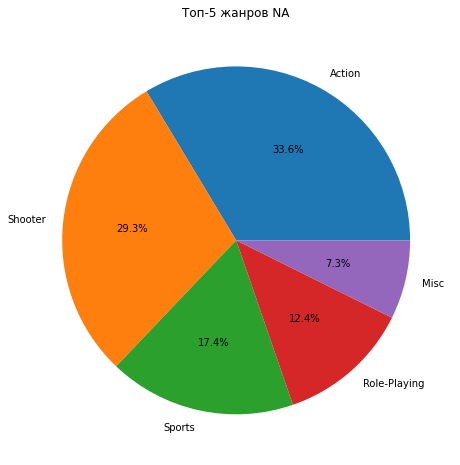

In [47]:
# Посмотрим долю рынка в стране
top5_genres_na = top5_genres_na.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_genres_na['na_sales'], labels=top5_genres_na.index, autopct='%1.1f%%')
plt.title('Топ-5 жанров NA')
plt.show()

В Северной Америке преобладает жанк Экшн, доля рынка 34%. Немного уступает жанр Шутер, 30%. Далее, по убывающей идут жанры спорт, ролевые игры и микс.

In [48]:
# Найдем топ-5 платформ в Европе
top5_genres_eu = pd.pivot_table(
                                  lider_year, index='genre', 
                                  values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
top5_genres_eu.head(5)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


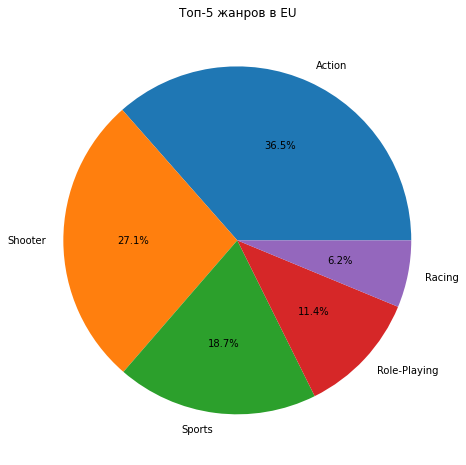

In [49]:
# Посмотрим долю рынка в стране
top5_genres_eu = top5_genres_eu.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_genres_eu['eu_sales'], labels=top5_genres_eu.index, autopct='%1.1f%%')
plt.title('Топ-5 жанров в EU')
plt.show()

В Европе так же преобладает жанр экшн 37%. С чуть большим отрывом идут шутеры и спортивные жанры. Замыкает рейтинг жанр гонки, 6%

In [50]:
# Найдем топ-5 жанров в Японии
top5_genres_jp = pd.pivot_table(
                                  lider_year, index='genre', 
                                  values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
top5_genres_jp.head(5)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


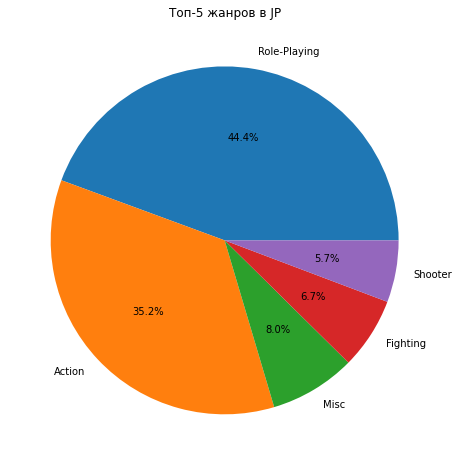

In [51]:
top5_genres_jp = top5_genres_jp.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_genres_jp['jp_sales'], labels=top5_genres_jp.index, autopct='%1.1f%%')
plt.title('Топ-5 жанров в JP')
plt.show()

Почти половину рынка занимает жанр ролевых игр -45%. С небольшим отставанием доля приходится на экшн. И доли менее 10% - это микс, драка и шутер.

In [52]:
# Найдем топ-5 жанров в других странах
top5_genres_other_sales = pd.pivot_table(
                                  lider_year, index='genre', 
                                  values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
top5_genres_other_sales.head(5)

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09


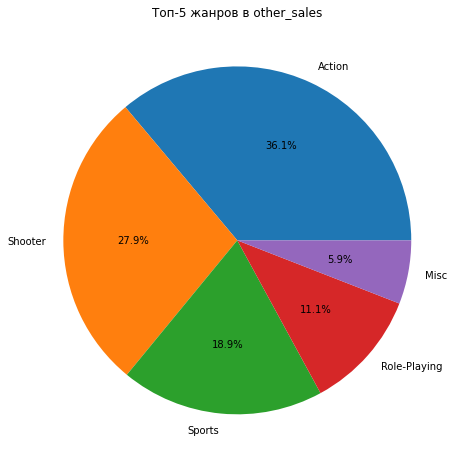

In [53]:
top5_genres_other_sales = top5_genres_other_sales.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_genres_other_sales['other_sales'], labels=top5_genres_other_sales.index, autopct='%1.1f%%')
plt.title('Топ-5 жанров в other_sales')
plt.show()

В других странах преобладает жанр экшн - 36%. Чуть отстает жанр шутер-28% Менее 19% достается спорту.

**Предварительный вывод**

Во всем мире преобладает жанр экшн. по пятам идет жанр шутер. Однако, в Японии над всеми жанрами преобладает ролевые игры, так как в стране присутсвуют множество субкультур, связаные с данными играми.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [54]:
#  Посмотрим, насколько рейтинг влияет на продажи в Северной Америке, исключив unknown
top5_rating_na = pd.pivot_table(lider_year, index='rating', 
                                 values='na_sales', aggfunc='sum')
top5_rating_na = top5_rating_na.sort_values('na_sales', ascending=False)
top5_rating_na

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


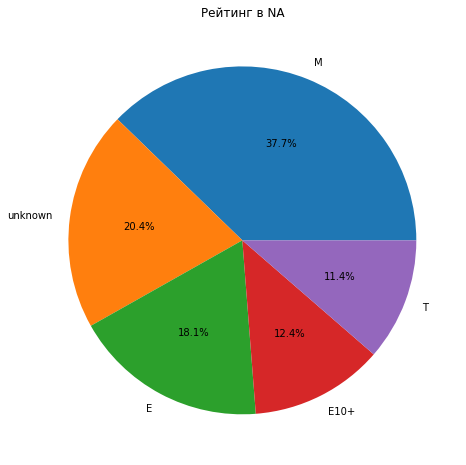

In [55]:
# Посмотрим долю рейтинга в стране
plt.figure(figsize=(8, 8))
plt.pie(top5_rating_na['na_sales'], labels=top5_rating_na.index, autopct='%1.1f%%')
plt.title('Рейтинг в NA')
plt.show()

38% игр производится с рейтингом 18+. В Северной Америке самое большое количество в мире турниров по играм 18+. 20% игр проданы без определенной категории. Наименьшее количество игр производится с рейтингом Т. Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Как правило, дети в данном возрасте предпочитают игры с более взрослым рейтингом, поэтому рейтинг Т плохо идет в продажах.

In [56]:
#  Посмотрим, насколько рейтинг влияет на продажи в Европе, исключив unknown
top5_rating_eu = pd.pivot_table(lider_year, index='rating', 
                                 values='eu_sales', aggfunc='sum')
top5_rating_eu = top5_rating_eu.sort_values('eu_sales', ascending=False)
top5_rating_eu

,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


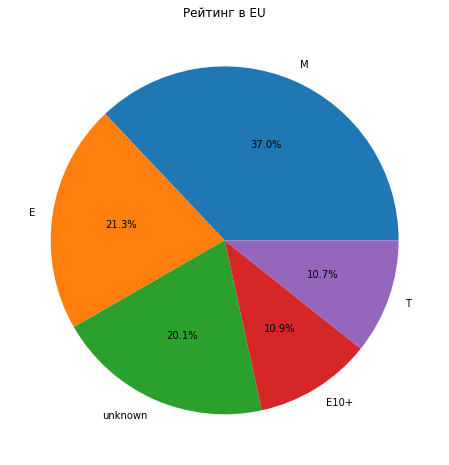

In [57]:
# Посмотрим долю рейтинга игр в стране
plt.figure(figsize=(8, 8))
plt.pie(top5_rating_eu['eu_sales'], labels=top5_rating_eu.index, autopct='%1.1f%%')
plt.title('Рейтинг в EU')
plt.show()

Ситуация с рейтингом в Европе аналогична с Северной Америкой.

In [58]:
#  Посмотрим, насколько рейтинг влияет на продажи в Японии, исключив unknown
top5_rating_jp = pd.pivot_table(lider_year, index='rating', 
                                 values='jp_sales', aggfunc='sum')
top5_rating_jp = top5_rating_jp.sort_values('jp_sales', ascending=False)
top5_rating_jp

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


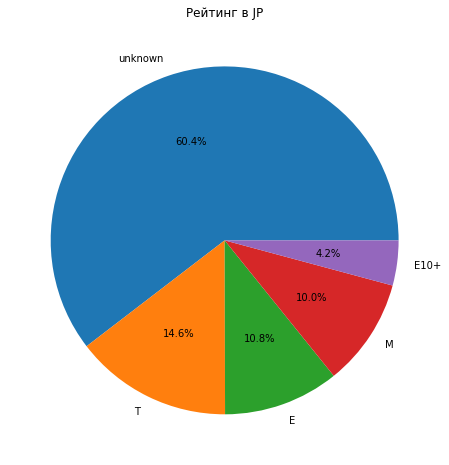

In [59]:
# Посмотрим долю рейтинга игр в стране
plt.figure(figsize=(8, 8))
plt.pie(top5_rating_jp['jp_sales'], labels=top5_rating_jp.index, autopct='%1.1f%%')
plt.title('Рейтинг в JP')
plt.show()

В Японии рейтинг меняется в корне. 60% игр не оценены рейтингом ESRB. Это объясняется тем, что он применяется главным образом для игр, реализуемых в США и Канаде. Из за того, что у взрослых японцев непринято увлекаться играми,основную нишу после неоцененных рейтингов занимают игры с рейтингом Т для подростков - 15%. С развыром в 4% остают игры с жанром для всех возрастов. Меньше всего игр продают с рейтингом 10+, чуть больше 4%.

In [60]:
#  Посмотрим, насколько рейтинг влияет на продажи в других странах, исключив unknown
top5_rating_other_sales = pd.pivot_table(lider_year, index='rating', 
                                 values='other_sales', aggfunc='sum')
top5_rating_other_sales = top5_rating_other_sales.sort_values('other_sales', ascending=False)
top5_rating_other_sales

,other_sales
rating,
M,47.04
unknown,23.46
E,22.61
T,14.29
E10+,12.57


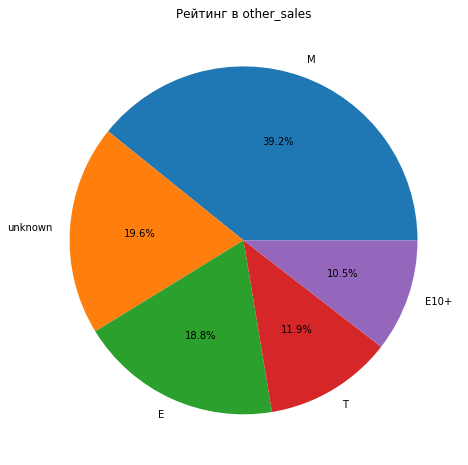

In [61]:
# Посмотрим долю рейтинга игр в странах
plt.figure(figsize=(8, 8))
plt.pie(top5_rating_other_sales['other_sales'], labels=top5_rating_other_sales.index, autopct='%1.1f%%')
plt.title('Рейтинг в other_sales')
plt.show()

**Предварительный вывод**

Во всем мире безоговорочный лидер среди оцененных рейтингом ESRB - рейтинг М(18+). В играх с данным рейтингом более красочные графики и интереснее сюжеты. В Японии рейтинг меняется в корне. 60% игр не оценены рейтингом ESRB. Это объясняется тем, что он применяется главным образом для игр, реализуемых в США и Канаде. Из за того, что у взрослых японцев непринято увлекаться играми,основную нишу после неоцененных рейтингов занимают игры с рейтингом Т для подростков - 15%

**ВЫВОД ПО РАЗДЕЛУ**

### Шаг 5. Проверьте гипотезы


#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза Н0: Средние пользовательские рейтинги платформ XOne = PC;

Гипотеза Н1: Средние пользовательские рейтинги платформ XOne != PC.

In [62]:
# Проверим гипотезу, убрав из данных заполненные пропуски
alpha = 0.05
xbox = lider_year.query('platform == "XOne" & user_score > -1')
pc = lider_year.query('platform == "PC" & user_score > -1')
results = st.ttest_ind(xbox['user_score'], pc['user_score'],  alternative = 'two-sided')
results.pvalue

0.14012658403611647

Не получилось отвергнуть нулевую гипотезу Н0: Средние пользовательские рейтинги платформ XOne = PC. Можно утверждать, что отсутствует статистически значимая разница между оценками пользователей на платформах Xbox One и PC.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Гипотеза:Средние пользовательские рейтинги жанров Action и Sports (англ. «спортивные соревнования») разные.

Гипотеза Н0: Средние пользовательские рейтинги жанров Action = Sports;

Гипотеза Н1: Средние пользовательские рейтинги жанров Action != Sports.

In [63]:
# Проверим гипотезу, убрав из данных заполненные пропуски
alpha = 0.05
action = lider_year.query('genre == "Action" & user_score > -1')
sports = lider_year.query('genre == "Sports" & user_score > -1')
results = st.ttest_ind(action['user_score'], sports['user_score'], alternative = 'two-sided')
results.pvalue

1.0517832389140023e-27

Отвергаем нулевую гипотезу Н0: Средние пользовательские рейтинги жанров Action = Sports, есть основания утверждать, что существует статистически значимая разница между оценками пользователей для жанров Action и Sports.

#### Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


Для проверки гипотез был применен t-тест для независимых выборок. 
Этот критерий выбран, потому что он позволяет сравнить средние значения двух независимых групп. T-тест также подходит, поскольку необходимо проверить, существует ли статистически значимая разница между этими двумя группами.

В первом случае условия для формулировки нулевой гипотезы выполняются, что означает равенство сравниваемых величин. Альтернативная гипотеза может быть проверена тремя способами: "меньше", "не равно" и "больше". Поскольку необходимо проверить равенство, следует использовать двухсторонний тест с параметром alternative='two-sided'.

Во втором случае условия для формулировки нулевой гипотезы (равенство сравниваемых параметров) не выполняются, так как сравниваемые величины не равны. Поэтому мы изменили подход: если мы отклоним нулевую гипотезу, это будет означать, что рейтинги различаются.

### Шаг 6. Напишите общий вывод

При исследовании данных были обнаружены и удалены пропуски в столбцах name и year_of_release из за их небольшого количества. В столбцах critic_score и user_score пропуски были заменены на -1, так как отсутствующих данных слишком много. Пропуски в столбце rating тоже заменять не стали, так как неизвестна методика выставления рейтинга. Изменили типы данных уу столбцов с годом выпуска, а также у оценок критиков и игроков. Выяснили, какую выручку несет каждая игра по всему миру.

Согласно анализу, в период с 1980 по 1990 год выпускали не более 25-30 игр в год, что делает эти данные менее значимыми для исследования. Пик выпуска игр пришелся на 2008-2009 годы, после чего наблюдается спад, вероятно, из-за новых технологий и акцента на качество. Платформа DS начала выпуск игр первой, с пиком производства в 2004-2007 годах, продолжая до 2013 года.
Платформы PS (PS, PS2, PS3) демонстрируют скачки в производстве игр при переходе на новые модификации, что оправдывает затраты на обновления. X360, запущенная в 2005 году, также показала пик в 2010 году, перед переходом на XOne после 2013 года.

Общий вывод указывает на срок жизни платформы около 10 лет и пик продаж в 5 лет. Новые модификации, как у DS и PS, способствовали увеличению продаж. Важно изучить период с 2013 по 2016 год, когда появились новые версии платформ и изменилось качество игр.
За этот период наблюдается падение продаж всех консолей, что связано с ростом компьютерных игр, не требующих дополнительных консолей. Лидерами продаж остаются PS4, PS3 и XOne. Ожидается спад PS3 в 2017 году с выходом PS4, в то время как XOne продолжит расти.

Корреляция между оценками критиков и продажами подчеркивает важность профессиональных рецензий для успеха, положительная связь между оценками критиков и пользователей указывает на согласие, а отсутствие корреляции между продажами и оценками пользователей может говорить о влиянии других факторов, таких как маркетинг.

Исследование подтверждает, что оценки критиков могут иметь большее значение для продаж, чем мнения пользователей. Лидерство жанра за 2013-2016 годы принадлежит Action, с наибольшим количеством выпущенных игр.
 300млн. Самый невостребованый жанр, это Puzzle. Как правило, сюжет этих игр достаточно однообразен и в постоянных выпусках не нуждается.

Во всем мире рынок делиться на 2 лагеря: PS и xbox. Однако, в Японии, жители предпочитают отечественные игры 3DS. Безусловно, суммарный лидер продаж - это PS4.

Во всем мире преобладает жанр экшн. по пятам идет жанр шутер. Однако, в Японии над всеми жанрами преобладает ролевые игры, так как в стране присутсвуют множество субкультур, связаные с данными играми.

Во всем мире безоговорочный лидер - рейтинг М(18+). В играх с данным рейтингом более красочные графики и интереснее сюжеты. Однако, в Японии, преобладают игры с рейтингом для подростков, так как в этой стране, взрослым не принято играть в игрушки.

Средние пользовательские рейтинги платформ XOne = PC. Можно утверждать, что отсутствует статистически значимая разница между оценками пользователей на платформах Xbox One и PC.  Средние пользовательские рейтинги жанров Action = Sports, есть основания утверждать, что существует статистически значимая разница между оценками пользователей для жанров Action и Sports.

На основе проделанного исследования, можно составить портреты, которые смогут помочь в дальнейшем анализе рынка и формировании стратегий для разработки и продвижения игр:

Портрет игрока на платформе PS4:
   - Предпочтения: Жанры Action и RPG.
   - Возраст: 18+ (рейтинг М).
   - Поведение: Открыт к новым играм, ориентирован на высокое качество графики и сюжета. 
   - Регион: Преобладает в Северной Америке и Европе.
   
   Портрет игрока на платформе Xbox One:
   - Предпочтения: Жанры Action и Shooter.
   - Возраст: 18+ (рейтинг М).
   - Поведение: Ценит многопользовательские режимы, активно участвует в онлайн-сообществах.
   - Регион: Сильные позиции в Северной Америке.
   
Портрет игрока на платформе 3DS (Япония):
   - Предпочтения: RPG и японские экшн-игры.
   - Возраст: Подростки и молодые взрослые.
   - Поведение: Предпочитает местные разработки и игры с яркими персонажами и сюжетами.
   - Регион: Преобладает в Японии, ориентирован на культурные особенности и субкультуры.
   
Портрет жанра Action:
   - Целевая аудитория: Широкая, включая подростков и взрослых.
   - Ключевые характеристики: Высокая динамика, интересный сюжет, качественная графика.
   - Продажи: Наиболее популярный жанр на всех платформах, особенно среди игроков с рейтингом М.

Портрет жанра Puzzle:
   - Целевая аудитория: Ограниченная, в основном для казуальных игроков.
   - Ключевые характеристики: Однообразные сюжеты, простота в игровом процессе.
   - Продажи: Наименее востребованный жанр, не требует постоянных обновлений.
